In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [23]:
# select k initial centroids for rgb image segmentation
def create_random_centroids(pixels, k):
    # m is number of pixels (rows), and n would be 3 (r,g,b)
    m, n = pixels.shape
    # Initialize k centroids random from the pixels with 3 channels 
    centroids = np.zeros((k, n))
    for i in range(k):
        # Randomly select a pixel from the image
        rand_index = np.random.randint(0, m)
        # Assign the pixel value to the centroid
        centroids[i] = pixels[rand_index]
    return centroids


In [3]:
centroids_test = create_random_centroids(np.array([[1, 2], [3, 4], [5, 6], [7, 8]]), 2)

In [4]:
print(centroids_test)

[[5. 6.]
 [1. 2.]]


In [27]:
def kmeans(image, k, max_iters=100):
    if len(image.shape) == 3 :
        # Reshape the image to a 2D array of pixels
        pixels = image.reshape(-1, 3)
    else:
        # If the image is grayscale, we need to reshape it to 2D
        pixels = image.reshape(-1, 1)
        
    # m is number of pixels (rows), and n would be 3 (r,g,b)
    m, n = pixels.shape
    
    # Initialize centroids
    centroids = create_random_centroids(pixels, k)
    
    # Initialize variables
    prev_centroids = np.zeros(centroids.shape)
    idx = np.zeros(m, dtype=int)  # integer indexing

    for _ in range(max_iters):
        print(f"Iteration {_ + 1}/{max_iters}")
        # Assign clusters
        for i in range(m):
            distances = np.linalg.norm(pixels[i] - centroids, axis=1)
            # Find the index of the closest centroid
            idx[i] = np.argmin(distances)
        
        # Update centroids
        prev_centroids = centroids.copy()
        for i in range(k):
            # Get all points assigned to the i-th centroid
            points_in_cluster = pixels[idx == i]
            # If there are points in the cluster, update the centroid
            if len(points_in_cluster) > 0:
                centroids[i] = np.mean(points_in_cluster, axis=0)
        
        # Check for convergence
        # because they might be close enough but not exactly equal 
        if np.allclose(centroids, prev_centroids):  
            print(f"Converged at {_} iterations")
            break
    
    # Build segmented image
    # Assign each pixel to the nearest centroid
    segmented_image = centroids[idx.astype(int)]
    # Reshape back to original image shape
    segmented_image = segmented_image.reshape(image.shape)
    

    return segmented_image


In [18]:
# Read and prepare image
image_test = cv2.imread('segment_images/2 color.jpg')
image_test = cv2.cvtColor(image_test, cv2.COLOR_BGR2RGB)
original_shape = image_test.shape  # (H, W, 3)
pixels = image_test.reshape((-1, 3))  # (H*W, 3)

# Run k-means
k = 2
centroids, idx = kmeans(pixels, k)

Converged at 2 iterations


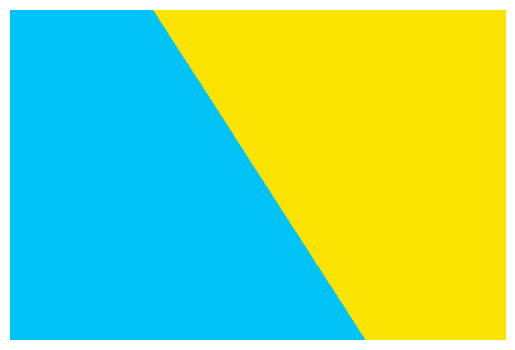

In [11]:
# Build segmented image
segmented_image = centroids[idx.astype(int)]
segmented_image = segmented_image.reshape(original_shape)

# Display
plt.imshow(segmented_image.astype(np.uint8))
plt.axis('off')
plt.show()


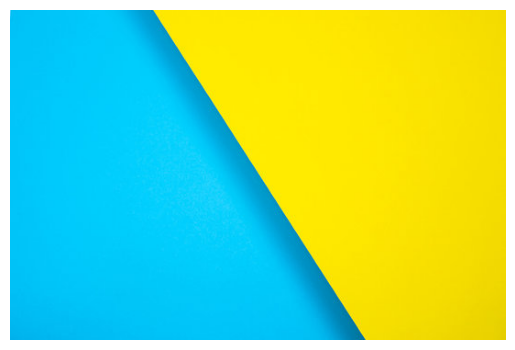

In [19]:
# Display
image_test = cv2.imread('segment_images/2 color.jpg')
image_test = cv2.cvtColor(image_test, cv2.COLOR_BGR2RGB)
plt.imshow(image_test)
plt.axis('off')
plt.show()

In [24]:
elephant_image = cv2.imread('segment_images/elephant.jpg')
elephant_image = cv2.cvtColor(elephant_image, cv2.COLOR_BGR2RGB)
segmented_elephant = kmeans(elephant_image, k=4)

Converged at 27 iterations


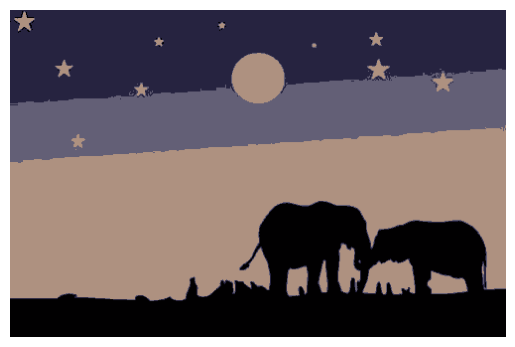

In [25]:
# Display
plt.imshow(segmented_elephant.astype(np.uint8))
plt.axis('off')
plt.show()

In [28]:
test_image = cv2.imread('segment_images/2 color.jpg', cv2.IMREAD_GRAYSCALE)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
segmented_test = kmeans(test_image, k=2)


Iteration 1/100
Iteration 2/100
Iteration 3/100
Converged at 2 iterations


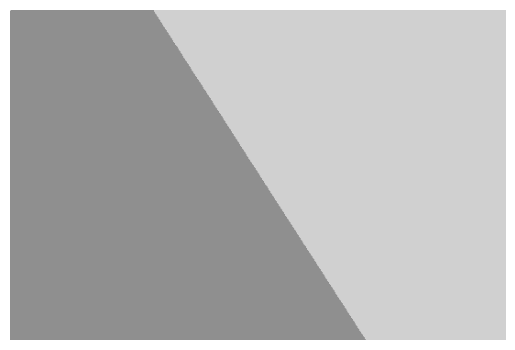

In [29]:
# Display
plt.imshow(segmented_test.astype(np.uint8), cmap='gray')
plt.axis('off')
plt.show()